In [1]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load dataframe
data = pd.read_csv('RanBenign_set.csv', index_col=0)
data.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.217.2.174-10.42.0.211-443-51023-6,10.42.0.211,51023,172.217.2.174,443,6,16/06/2017 03:55:47,151054,6,8,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,172.217.2.174-10.42.0.211-443-51023-6,10.42.0.211,51023,172.217.2.174,443,6,16/06/2017 03:55:47,349,2,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,172.217.12.174-10.42.0.211-443-34259-6,10.42.0.211,34259,172.217.12.174,443,6,16/06/2017 03:55:52,119,2,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,172.217.10.74-10.42.0.211-443-55509-6,10.42.0.211,55509,172.217.10.74,443,6,16/06/2017 03:55:53,37055,1,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,172.217.2.174-10.42.0.211-443-44852-6,10.42.0.211,44852,172.217.2.174,443,6,16/06/2017 03:55:58,178727,6,7,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [3]:
#check class counts
sizes = data['Label'].value_counts(sort=1)
print(sizes)

1    348943
0    249245
Name: Label, dtype: int64


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

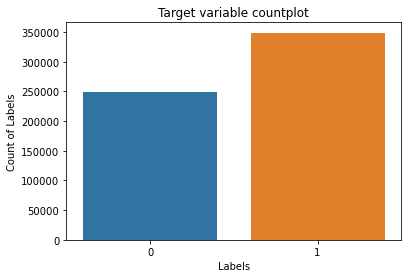

In [4]:
#graph plot
sns.countplot(data["Label"])
plt.xlabel("Labels")
plt.ylabel("Count of Labels")
plt.title("Target variable countplot")
plt.show

In [5]:
#eliminating unimportant and duplicate columns 
data=data.drop([' Timestamp', 'Flow ID', ' Source IP' ], axis=1)
data=data.drop([' Destination IP', ' Fwd Header Length.1'  ], axis=1)
#eliminating constant columns
data=data.drop([' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags' ], axis=1)
data=data.drop([' RST Flag Count', ' CWE Flag Count', ' ECE Flag Count'  ], axis=1)
data=data.drop(['Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate' ], axis=1)
data=data.drop([' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'  ], axis=1)

In [6]:
#check null values
data.isnull().sum()

 Source Port          0
 Destination Port     0
 Protocol             0
 Flow Duration        0
 Total Fwd Packets    0
                     ..
Idle Mean             0
 Idle Std             0
 Idle Max             0
 Idle Min             0
Label                 0
Length: 68, dtype: int64

In [7]:
# Separatating & assigning features and target columns to X & y

y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((598188, 67), (598188,))

In [8]:
# Splitting the dataset into train and test sets: 75-25 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state = 100)
X_train.shape, X_test.shape

((448641, 67), (149547, 67))

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
from xgboost import XGBClassifier

C:\Users\Dell\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [12]:
params = {
            'max_depth': 50,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':175
        }
xgb_clf = XGBClassifier(**params)

In [13]:
%%time
xgb_clf.fit(X_train_scaled, y_train)

C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:20:32] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: total: 1h 30min 35s
Wall time: 12min 49s


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=1.0, max_delta_step=0,
              max_depth=50, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=175, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [14]:
print(xgb_clf)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=1.0, max_delta_step=0,
              max_depth=50, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=175, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [15]:
# make predictions on test data
y_pred = xgb_clf.predict(X_test_scaled)
y_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8099192895878887

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77     62023
           1       0.83      0.85      0.84     87524

    accuracy                           0.81    149547
   macro avg       0.81      0.80      0.80    149547
weighted avg       0.81      0.81      0.81    149547



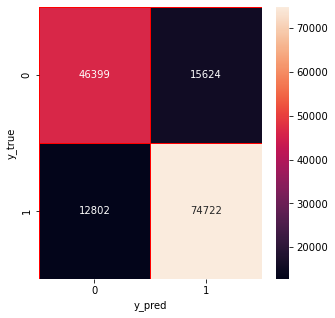

In [18]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

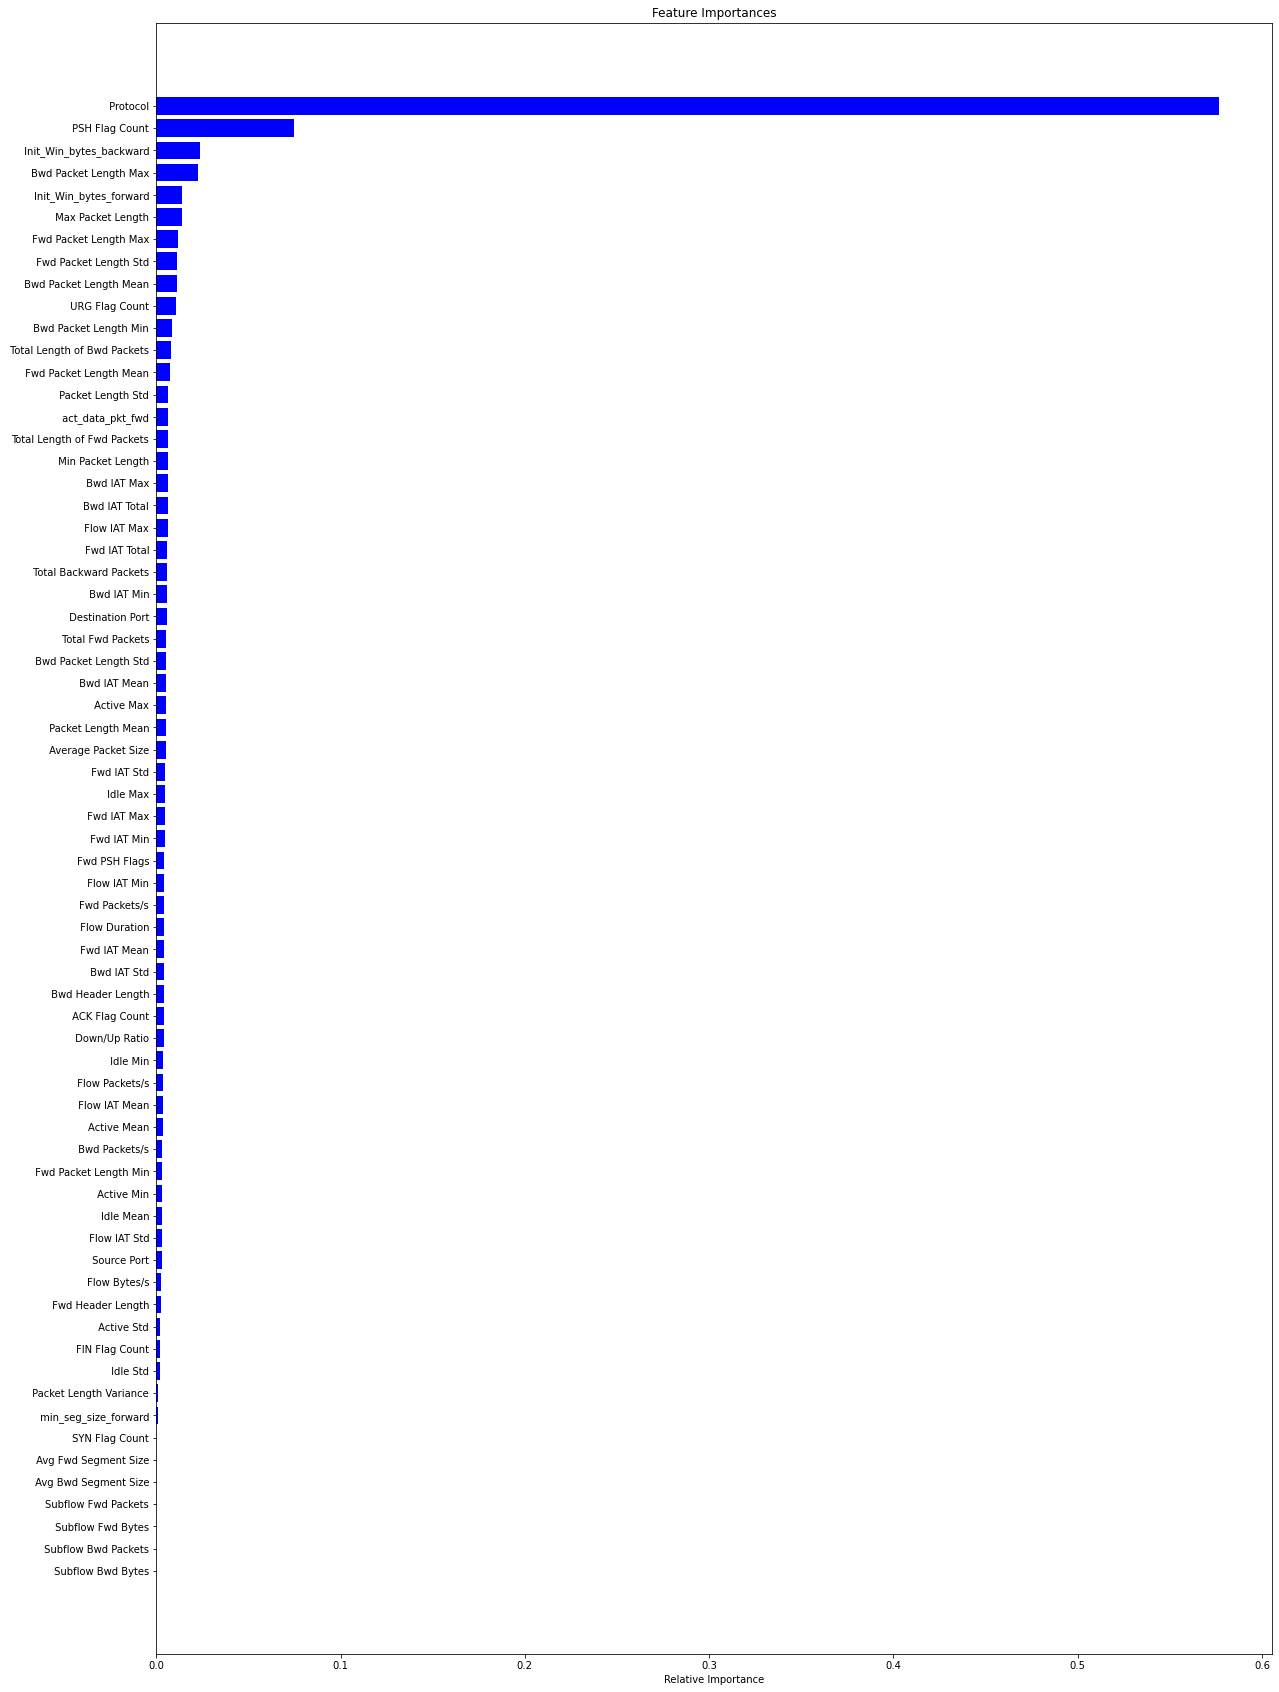

In [21]:
#Feature importances
features=data.columns
importances=xgb_clf.feature_importances_
indices=np.argsort(importances)

plt.figure(figsize=(20,30))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features [i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()